# 1. Définition du Problème et Objectifs

## Contexte et Pertinence 

Dans un contexte mondial où la gestion efficace de l'énergie est devenue une priorité, notre projet vise à analyser la consommation d'énergie par commune en France. L'objectif est de fournir une compréhension des modèles de consommation énergétique, qui est essentielle tant pour orienter les politiques énergétiques, que pour promouvoir la durabilité et optimiser les ressources. Ce projet nous semble pertinent étant donné les défis actuels liés au changement climatique et à la transition énergétique. En examinant les données de consommation énergétique à l'échelle des communes, nous pouvons identifier des tendances spécifiques, des anomalies et des opportunités d'amélioration. Cela permettra aux décideurs, aux entreprises et aux consommateurs de prendre des mesures adaptées au niveau de leur consommation d'énergie. En outre, ce projet contribue à une meilleure compréhension des disparités régionales en matière de consommation d'énergie. Cela permetterait d'avoir une perspective pour des interventions personnalisées.  

## Objectifs du Projet

Notre projet, qui traite à la fois de sujets environnementaux et sociétaux, se fixe les objectifs suivants :

**Cartographie de la Consommation Énergétique :** Notre premier objectif est de dresser une carte de la consommation d'énergie dans les différentes communes françaises. En mettant en lumière ces données, nous souhaitons offrir une vision éclairée de la répartition énergétique sur le territoire.

**Identification des Tendances et Anomalies :** Nous cherchons à identifier les tendances et à détecter des anomalies dans les habitudes de consommation énergétique. Cela permettra de comprendre les pratiques énergétiques actuelles, et ainsi identifier les sources d'amélioration.

**Prédiction des Tendances Futures :** Nous souhaiterions développer des modèles prédictifs pour anticiper les évolutions futures de la consommation d'énergie. Ces prévisions seront essentielles pour planifier des stratégies énergétiques à long terme.

**Contribution à la Durabilité :** En traitant le sujet de la consommation d'énergie, le projet cherche à s'incrire dans le cadre d'initiatives de développement durable. Les insights générés pourraient inspirer des actions pour réduire l'empreinte énergétique.

**Support aux Décisions Politiques et Commerciales :** Nous souhaiterions fournir des données et des analyses pour aider les décisions politiques et commerciales en matière de gestion de l'énergie. Cela inclut la recommandation de politiques efficaces et la sensibilisation aux meilleures pratiques en matière de consommation énergétique.

**Sensibilisation et Éducation :** Enfin, nous souhaitons utiliser nos résultats pour sensibiliser le public et les décideurs aux enjeux de la consommation d'énergie. L'objectif est de promouvoir une culture de consommation énergétique responsable et informée.

## Aspects techniques

### Packages

On installe tout les packages nécessaire au fonctionnement du notebook

In [1]:
%pip install requests lxml bs4 pandas seaborn numpy scipy statsmodels matplotlib scikit-learn ipywidgets py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

  Cloning https://github.com/inseefrlab/cartiflette (to revision 80b8a5a28371feb6df31d55bcc2617948a5f9b1a) to /tmp/pip-req-build-e747l56c
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-e747l56c
  Running command git rev-parse -q --verify 'sha^80b8a5a28371feb6df31d55bcc2617948a5f9b1a'
  Running command git fetch -q https://github.com/inseefrlab/cartiflette 80b8a5a28371feb6df31d55bcc2617948a5f9b1a
  Running command git checkout -q 80b8a5a28371feb6df31d55bcc2617948a5f9b1a
  Resolved https://github.com/inseefrlab/cartiflette to commit 80b8a5a28371feb6df31d55bcc2617948a5f9b1a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━

In [2]:
# Standard Libraries
import re
import urllib.request
from urllib import request

# Third-party Libraries
import gc
import requests
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import geopandas as gpd
from shapely.geometry import shape
import cartiflette.s3 as s3
import ipywidgets as widgets
import warnings
from sklearn import (model_selection, linear_model, ensemble, svm, tree, neural_network, preprocessing, metrics)
from scipy.stats import shapiro, bartlett, anderson
from statsmodels.stats.stattools import durbin_watson
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import TwoSlopeNorm
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import matplotlib.ticker as ticker 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from itertools import combinations

# Specific functions or classes
from IPython.display import display, Latex, HTML

# Désactiver les avertissements SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# 2. Collecte, nettoyage et préparation des données (Communes)

## Récupération

### Bases de données pre-existantes

Nous avons extrait des données cruciales pour notre projet à partir de deux sources de confiance : le site data.gouv, une référence en données publiques, et l'Observatoire des Territoires, spécialisé dans la géographie et l'aménagement. Cette approche éthique et légale garantit la qualité de nos analyses en nous fournissant une base solide et diversifiée. La collaboration avec ces plateformes renforce la fiabilité de nos résultats, consolidant ainsi notre projet.

* #### Consommation totale d'énergie par commune

In [3]:
# Ignorer les avertissements pour une sortie propre
warnings.filterwarnings('ignore')

url = "https://www.data.gouv.fr/fr/datasets/r/8f4d90b3-0fdc-42ec-97ce-e5992b4200a6"

# Charger les données dans un dataframe
table_conso_com = pd.read_csv(url, delimiter=";")
table_conso_com

,operateur,annee,filiere,consoa,pdla,nombre_maille_secretisees_a,indquala,consoi,pdli,nombre_maille_secretisees_i,...,libelle_commune,code_epci,libelle_epci,code_departement,libelle_departement,code_region,libelle_region,id_filiere,consototale,code_postal
0,Enedis,2018,Electricité,0.000000,0,1,0.000,0.00,0,0,...,Bourg-de-Bigorre,200070787,CC du Plateau de Lannemezan,65,Hautes-Pyrénées,76,Occitanie,100,624.662249,65130
1,Enedis,2018,Electricité,0.000000,0,1,0.000,0.00,0,0,...,Bourréac,200069300,CA Tarbes-Lourdes-Pyrénées,65,Hautes-Pyrénées,76,Occitanie,100,375.938097,65100
2,Enedis,2018,Electricité,0.000000,0,1,0.000,0.00,0,0,...,Bramevaque,200070829,CC Neste Barousse,65,Hautes-Pyrénées,76,Occitanie,100,96.270722,65370
3,Enedis,2018,Electricité,0.000000,0,1,0.000,0.00,0,1,...,Bulan,200070787,CC du Plateau de Lannemezan,65,Hautes-Pyrénées,76,Occitanie,100,193.383966,65130
4,Enedis,2018,Electricité,224.379373,12,0,0.463,0.00,0,0,...,Buzon,200072106,CC Adour Madiran,65,Hautes-Pyrénées,76,Occitanie,100,476.316740,65140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501560,Enedis,2012,Electricité,0.000000,0,0,0.000,135.46,1,0,...,Saint-Ulphace,247200686,CC du Pays de l'Huisne Sarthoise,72,Sarthe,52,Pays de la Loire,100,1284.060000,72320
501561,Enedis,2012,Electricité,0.000000,0,0,0.000,387.38,1,0,...,Saint-Vincent-du-Lorouër,200070373,CC Loir-Lucé-Bercé,72,Sarthe,52,Pays de la Loire,100,4203.720000,72150
501562,Enedis,2012,Electricité,238.200000,6,0,0.989,29.49,1,0,...,Savigné-sous-le-Lude,200073112,CC Sud Sarthe,72,Sarthe,52,Pays de la Loire,100,2093.960000,72800
501563,Enedis,2012,Electricité,0.000000,0,0,0.000,19659.51,7,0,...,Solesmes,247200090,CC de Sablé-sur-Sarthe,72,Sarthe,52,Pays de la Loire,100,33036.560000,72300


Nous avons obtenu les données de l'Observatoire des Territoires en téléchargeant manuellement la table depuis leur site web. En raison de la complexité pour effectuer le webscraping ou utiliser une API, nous avons choisi cette approche alternative, et M. Lino Galiana nous a explicitement autorisés à procéder de cette manière.

Les données téléchargées ont été ensuite importées dans notre environnement Python en utilisant la fonction read_csv de la bibliothèque pandas. Nous avons ensuite mis en place un dépôt Git pour stocker et partager ces données dans le cadre de notre projet.

Remarque : La complexité de la récupération des données a conduit à cette approche, et nous avons pris soin de documenter l'ensemble du processus pour assurer la traçabilité des données.

Vous trouverez ci-après les liens qui mènent à la page de récupération des données sur le site de l'Obeservatire des territoires : 

- Logement vacants : https://www.observatoire-des-territoires.gouv.fr/outils/cartographie-interactive/#bbox=-645836,6062176,1794690,1016154&c=indicator&i=insee_rp_hist_1968.part_logt_vacant&s=2020&view=map59
- Nombre d'entreprise : https://www.observatoire-des-territoires.gouv.fr/outils/cartographie-interactive/#c=indicator&f=TOT&i=demo_ent_sect.ent_tot&s=2021&view=map59
- Niveau de vie : https://www.observatoire-des-territoires.gouv.fr/outils/cartographie-interactive/#c=indicator&i=filosofi.med_disp&s=2020&view=map59
- Déplacement domicile-travail en transport en commun : https://www.observatoire-des-territoires.gouv.fr/outils/cartographie-interactive/#bbox=-645836,6062176,1794690,1016154&c=indicator&i=insee_rp_hist_xxxx.part_domtrav_voit&s=2020&view=map59


* #### Logements vacants par commune

Un taux élevé de logements vacants peut indiquer une région en déclin démographique ou économique. Dans ces situations, la consommation d'électricité peut être réduite en raison d'une activité économique moindre et d'une population résidente moins nombreuse, impactant ainsi la demande énergétique.

In [4]:
warnings.filterwarnings('ignore')

table_logements_vacants_com = pd.read_csv('logement_vacants_com.csv', sep=';', encoding='ISO-8859-1')
table_logements_vacants_com.head()

,codgeo,libgeo,an,part_logt_vacant
0,1001,L'Abergement-Clémenciat,1968,"15,5"
1,1001,L'Abergement-Clémenciat,1975,"12,6"
2,1001,L'Abergement-Clémenciat,1982,"9,1"
3,1001,L'Abergement-Clémenciat,1990,"4,6"
4,1001,L'Abergement-Clémenciat,1999,"3,1"


* #### Nombre d'entreprises par commune

Le nombre d'entreprises dans une région peut avoir un impact significatif sur la consommation d'électricité. Les entreprises, en particulier celles du secteur industriel, peuvent nécessiter des quantités importantes d'énergie pour leurs opérations. Ainsi, un nombre élevé d'entreprises pourrait contribuer à une demande d'électricité plus importante.

In [5]:
table_nb_entr_com = pd.read_csv('table_nb_entr_com.csv',sep=';')
table_nb_entr_com.head()

,Code,Libellé,Nombre d'entreprises par secteurs d'activité 2021,Nombre d'entreprises par secteurs d'activité 2021.1
0,1001,L'Abergement-Clémenciat,41,2
1,1002,L'Abergement-de-Varey,18,3
2,1004,Ambérieu-en-Bugey,1097,54
3,1005,Ambérieux-en-Dombes,133,12
4,1006,Ambléon,7,0


* #### Niveau de vie par commune

Les régions avec un niveau de vie élevé peuvent avoir des habitudes de consommation plus énergivores. Des ménages plus aisés peuvent avoir des équipements électroniques plus nombreux, des systèmes de chauffage et de climatisation sophistiqués, contribuant ainsi à une consommation d'électricité supérieure.

In [6]:
table_niveau_vie_com = pd.read_csv('niveau_vie_com.csv',sep=';')
table_niveau_vie_com.head()

,Code,Libellé,Médiane du revenu disponible par UC 2020
0,1001,L'Abergement-Clémenciat,24820
1,1002,L'Abergement-de-Varey,23220
2,1004,Ambérieu-en-Bugey,21070
3,1005,Ambérieux-en-Dombes,24380
4,1006,Ambléon,N/A - résultat non disponible


* #### Taux de déplacement domicile-travail en transport en commun

Les zones où un pourcentage élevé de la population utilise les transports en commun peuvent avoir une demande d'électricité différente. Les systèmes de transport en commun, tels que les trains électriques ou les bus, dépendent de l'électricité. Ainsi, une utilisation fréquente de ces moyens de transport peut entraîner une demande d'électricité plus importante dans la commune.

In [7]:
# url = https://www.observatoire-des-territoires.gouv.fr/outils/cartographie-interactive/#bbox=-645836,6062176,1794690,1016154&c=indicator&i=insee_rp_hist_xxxx.part_domtrav_voit&s=2020&view=map59

table_dep_domtrav_tc = pd.read_csv('dep_domtrav_tc.csv', sep=';', encoding='ISO-8859-1')
table_dep_domtrav_tc.head()

,codgeo,libgeo,an,part_domtrav_tc
0,1001,L'Abergement-Clémenciat,2009,"1,2"
1,1001,L'Abergement-Clémenciat,2014,"4,1"
2,1001,L'Abergement-Clémenciat,2020,"1,1"
3,1002,L'Abergement-de-Varey,2009,"7,7"
4,1002,L'Abergement-de-Varey,2014,"4,8"


### Bases de données webscrappées

Pour enrichir notre analyse, nous avons utilisé le web scraping pour extraire la population de chaque commune, à partir du site Wikipédia, ajoutant ainsi une dimension à notre ensemble de données. Cette approche, combinée à nos sources préexistantes comme data.gouv et l'Observatoire des Territoires, renforce la profondeur de notre étude, offrant des perspectives plus complètes.

* #### Population par commune

La taille de la population est généralement corrélée positivement avec la consommation d'électricité. Plus la population est grande, plus les besoins en énergie pour les logements, les commerces et les industries sont importants. Les zones peuplées ont souvent une demande d'électricité plus élevée.

In [8]:
url_communes = "https://fr.wikipedia.org/wiki/Listes_des_communes_de_France"
text_communes = request.urlopen(url_communes).read().decode('utf-8')
page_communes = BeautifulSoup(text_communes, 'html.parser')
tableau_communes = page_communes.find('table', {'class': 'wikitable'})
tableau_communes = tableau_communes.find('tbody')
lignes_communes = tableau_communes.find_all('tr')
lignes_communes = lignes_communes[:-13]

# Liste pour stocker les url des pages wikipédia de chaque commune
liste_url_communes = []

# Parcourir chaque ligne dans lignes_communes
for ligne in lignes_communes:
    # Trouver toutes les balises <td> dans la ligne
    td_tags = ligne.find_all('td')

    if len(td_tags) >= 3:
        if td_tags[-3].text.strip() != '75':
            derniere_td = td_tags[-1]
            a_tag = derniere_td.find('a')
            if a_tag:
                contenu_apres_href = a_tag.get('href')
                liste_url_communes.append(contenu_apres_href)

dico_communes = {}
liste_code_communes = []

for url in liste_url_communes:
    text = request.urlopen("https://fr.wikipedia.org" + url).read().decode('utf-8')
    page = BeautifulSoup(text, 'html.parser')  # Utilisez html.parser au lieu de lxml
    tableau = page.find('table', {'class': 'wikitable sortable titre-en-couleur'})
    tableau = tableau.find('tbody')
    lignes = tableau.find_all('tr')
    lignes.pop(0)
    lignes.pop(-1)

    for ligne in lignes:
        donnees = ligne.find_all('td')
        code_insee = donnees[1].text.strip()
        liste_code_communes.append(code_insee)
        pop_commune = donnees[-3].text.strip()
        dico_communes[code_insee] = pop_commune

# Créer le DataFrame à partir du dictionnaire
table_pop_com = pd.DataFrame.from_dict(dico_communes, orient='index').reset_index()
table_pop_com = table_pop_com.rename(columns={'index': 'Code commune'})
table_pop_com.head()


,Code commune,0
0,01053,41 525 (2021)
1,01001,832 (2021)
2,01002,267 (2021)
3,01004,14 854 (2021)
4,01005,1 897 (2021)


### Récupération de données via API

* #### Température par commune

La température peut avoir un impact direct sur la consommation d'électricité. Dans les régions où les températures sont extrêmes (chaudes en été ou froides en hiver), la demande d'électricité pourrait augmente en raison de l'utilisation intensive de la climatisation ou du chauffage. La météo aurait donc une influence significative sur la consommation d'électricité.

Nous souhaitons compléter notre analyse en récupérant les données de température de chaque commune via une API de OpenDataSoft. Cette démarche vise à intégrer une perspective climatique à nos sources existantes, renforçant ainsi la pertinence de nos analyses territoriales.

In [9]:
# Dictionnaire pour stocker les moyennes de température par commune
dico_temp_communes = {}

root_api = "https://public.opendatasoft.com"

# Initialiser un compteur pour les valeurs manquantes
missing_values_count = 0
limit_missing_values = 100

for codegeo in liste_code_communes:
    # Arrêter le programme si on a trop de valeurs manquantes
    if missing_values_count >= limit_missing_values:
        print("On arrête le programme en raison d'un nombre de valeurs manquantes trop important")
        break

    url = f"{root_api}/api/explore/v2.1/catalog/datasets/donnees-synop-essentielles-omm/records?select=codegeo%2C%20tc%2C%20latitude%2C%20longitude&where=codegeo%3D%22{codegeo}%22&limit=99"
    req = requests.get(url)
    temp = req.json()
    results = temp.get('results', [])
    df = pd.DataFrame(results)
    
    if 'tc' in df.columns:
        # Compter le nombre de valeurs manquantes dans la colonne 'tc'
        missing_values_count += df['tc'].isna().sum()

        # Calculer la moyenne des températures, en ignorant les valeurs manquantes
        moyenne = round(df['tc'].mean(), 2)
        dico_temp_communes[codegeo] = moyenne
    else:
        missing_values_count += 1  # Compter l'absence complète de la colonne comme une valeur manquante
        print(f"La commune {codegeo} ne présente aucun relevé de température")

# Si le programme s'achève sans interruption, afficher les résultats
if missing_values_count < limit_missing_values:
    print(dico_temp_communes)


La commune 01053 ne présente aucun relevé de température
La commune 01001 ne présente aucun relevé de température
La commune 01002 ne présente aucun relevé de température
La commune 01004 ne présente aucun relevé de température
La commune 01005 ne présente aucun relevé de température
La commune 01006 ne présente aucun relevé de température
La commune 01007 ne présente aucun relevé de température
La commune 01008 ne présente aucun relevé de température
La commune 01009 ne présente aucun relevé de température
La commune 01010 ne présente aucun relevé de température
La commune 01011 ne présente aucun relevé de température
La commune 01012 ne présente aucun relevé de température
La commune 01013 ne présente aucun relevé de température
La commune 01014 ne présente aucun relevé de température
La commune 01016 ne présente aucun relevé de température
La commune 01015 ne présente aucun relevé de température
La commune 01017 ne présente aucun relevé de température
La commune 01019 ne présente au

Nous constatons que cette approche génère un nombre significatif de données manquantes. Bien que la variable de température par commune demeure cruciale pour expliquer la consommation d'énergie, il n'est pas envisageable de sacrifier une part importante de notre base de données en raison de ces lacunes. Nous sommes à la recherche d'un compromis qui nous permettrait d'intégrer une variable météorologique dans notre modèle tout en conservant une quantité adéquate de données.

Ainsi, nous optons pour une solution consistant à associer à chaque commune la température moyenne du département correspondant, sous l'hypothèse que la température présente une homogénéité suffisante au sein d'un même département. Cette stratégie nous permet d'enrichir notre modèle sans compromettre de manière significative la taille de notre jeu de données.

Voici comment nous avons créé notre variable météorologique : nous avons extrait la température relevée au premier jour de chaque mois, dans chaque commune, tout au long de l'année 2021. Une fois ces 12 données collectées, nous les avons moyennées. Cette méthode confère à la variable une variance potentiellement élevée, mais nous pourrions réduire cette variabilité en augmentant la fréquence des relevés avant de procéder à la moyenne, par exemple en récupérant la température chaque 1er et 15 du mois. Cependant, cette amélioration serait compensée par une augmentation du temps de calcul.

In [10]:
# URL de base et structure de l'URL de l'API
root_api = "https://odre.opendatasoft.com"
base_url = "/api/explore/v2.1/catalog/datasets/temperature-quotidienne-departementale/records"
base_query = "?select=date_obs%2Ccode_insee_departement%2Cdepartement%2Ctmoy&order_by=code_insee_departement&limit=99&refine=date_obs%3A%222021%22"

# Collecte des données pour chaque mois
df_list = []
for i in range(1, 13):
    date_str = f"2021-{i:02d}-01"
    url_api = f"{root_api}{base_url}{base_query}&where=date_obs%3Ddate'{date_str}'"
    req = requests.get(url_api)
    temp = req.json()
    results = temp.get('results', [])
    df = pd.DataFrame(results)
    if not df.empty:
        df = df[['date_obs', 'code_insee_departement', 'departement','tmoy']]
        df_list.append(df)

# Fusionner tous les DataFrames en un seul
df_final = pd.concat(df_list)

# Calcul de la moyenne des températures par code et nom de département
table_temperatures = df_final.groupby(['code_insee_departement', 'departement'])['tmoy'].mean().reset_index()

# Affichage du DataFrame final
table_temperatures.head()

# Création d'un DataFrame à partir de la liste des codes INSEE
data_communes = {'code_commune': liste_code_communes}
df_communes = pd.DataFrame(data_communes)

# Exécution d'une jointure entre les deux DataFrames
table_temperatures_com = pd.merge(df_communes, table_temperatures, left_on=df_communes['code_commune'].str[:2], right_on=table_temperatures['code_insee_departement'])

# Afficher le résultat
table_temperatures_com[['code_commune', 'tmoy']].head()


,code_commune,tmoy
0,01053,11.875
1,01001,11.875
2,01002,11.875
3,01004,11.875
4,01005,11.875


## Processus de nettoyage des données

Maintenant que nous avons récupéré les données nécessaires, notre objectif est de les regrouper de manière claire et concise dans un unique dataframe. Cette consolidation facilitera l'analyse et le traitement des informations, offrant ainsi une vue d'ensemble cohérente pour une meilleure compréhension et interprétation de nos résultats.

Pour atteindre cet objectif, nous entreprenons plusieurs étapes. Tout d'abord, nous allons standardiser les noms des variables de chaque table, assurant ainsi leur uniformité pour une variable donnée. Par ailleurs, nous sélectionnerons uniquement les variables qui revêtent un intérêt particulier pour notre analyse. Egalement, nous procéderons à une standardisation des valeurs manquantes, notées "NA", pour assurer une cohérence dans nos données.

Par la suite, nous fusionnerons les tables à partir de la variable du code de la commune, facilitant ainsi la cohérence et la comparabilité des données. De plus, nous veillerons à harmoniser le format des variables, en utilisant des points au lieu de virgules pour les nombres et en garantissant que le code de commune soit représenté par un nombre à 5 chiffres, évitant ainsi toute ambiguïté avec des codes à 4 chiffres. Cette démarche prévient les risques potentiels, tels que la distinction entre les codes de commune 01304 et 1304, qui doivent être traités de manière identique, étant la même commune. L'harmonisation du format des variables contribuera ainsi à la qualité et à la précision de notre ensemble de données consolidé.

In [11]:
# Sélection des variables nécessaires
df_filtered = table_conso_com[['annee', 'filiere', 'code_commune', 'libelle_commune', 'consototale']]

# Filtrer les données pour ne garder que celles de l'année 2021, et l'electricité
df_filtered = df_filtered[df_filtered['annee'] == 2021]
df_filtered = df_filtered[df_filtered['filiere'] == 'Electricité']

# Convertir la colonne 'code_commune' en chaîne de caractères
df_filtered['code_commune'] = df_filtered['code_commune'].astype(str)

# Trier les données par commune en ordre croissant
df_filtered = df_filtered.sort_values(by=['code_commune'])

# Garder la première occurrence pour chaque commune
df_filtered = df_filtered.drop_duplicates(subset='code_commune')

# Réinitialiser l'index
df_filtered = df_filtered.reset_index(drop=True)

# Affecter le DataFrame final à la variable 'table_conso_com'
table_conso_com = df_filtered
table_conso_com.head()

,annee,filiere,code_commune,libelle_commune,consototale
0,2021,Electricité,01001,L'Abergement-Clémenciat,3597.380676
1,2021,Electricité,01002,L'Abergement-de-Varey,1220.681183
2,2021,Electricité,01004,Ambérieu-en-Bugey,79747.076997
3,2021,Electricité,01006,Ambléon,431.475874
4,2021,Electricité,01007,Ambronay,16454.806074


In [12]:
table_logements_vacants_com=table_logements_vacants_com.rename(columns={
    'codgeo': 'code_commune',
    'libgeo': 'libelle_commune',
    'an': 'an',
    'part_logt_vacant': 'logements_vacants_%'
})
table_logements_vacants_com = table_logements_vacants_com[table_logements_vacants_com['an'] == 2020]
table_logements_vacants_com.head()

,code_commune,libelle_commune,an,logements_vacants_%
7,1001,L'Abergement-Clémenciat,2020,"5,7"
15,1002,L'Abergement-de-Varey,2020,"8,8"
23,1004,Ambérieu-en-Bugey,2020,"9,9"
31,1005,Ambérieux-en-Dombes,2020,"10,7"
39,1006,Ambléon,2020,"10,8"


In [13]:
table_pop_com=table_pop_com.rename(columns={
    'Code commune': 'code_commune',
    0: 'population',
})
table_pop_com['population'] = table_pop_com['population'].str.replace(r'\s*\([^)]*\)\s*', '', regex=True)
table_pop_com.head()

,code_commune,population
0,01053,41 525
1,01001,832
2,01002,267
3,01004,14 854
4,01005,1 897


In [14]:
table_niveau_vie_com=table_niveau_vie_com.rename(columns={
    'Code': 'code_commune',
    'Libellé': 'libelle_commune',
    'Médiane du revenu disponible par UC 2020': 'niveau_de_vie'
})
table_niveau_vie_com['niveau_de_vie'] = table_niveau_vie_com['niveau_de_vie'].replace('N/A - résultat non disponible', pd.NA)
table_niveau_vie_com.head()

,code_commune,libelle_commune,niveau_de_vie
0,1001,L'Abergement-Clémenciat,24820
1,1002,L'Abergement-de-Varey,23220
2,1004,Ambérieu-en-Bugey,21070
3,1005,Ambérieux-en-Dombes,24380
4,1006,Ambléon,<NA>


In [15]:
table_nb_entr_com = table_nb_entr_com.rename(columns={
    'Code': 'code_commune',
    'Libellé': 'libelle_commune',
    'Nombre d\'entreprises par secteurs d\'activité 2021': 'nombre_entreprises',
    'Nombre d\'entreprises par secteurs d\'activité 2021.1': 'nombre_entreprises_industrielles'
})
table_nb_entr_com.head()

,code_commune,libelle_commune,nombre_entreprises,nombre_entreprises_industrielles
0,1001,L'Abergement-Clémenciat,41,2
1,1002,L'Abergement-de-Varey,18,3
2,1004,Ambérieu-en-Bugey,1097,54
3,1005,Ambérieux-en-Dombes,133,12
4,1006,Ambléon,7,0


In [16]:
table_dep_domtrav_tc = table_dep_domtrav_tc.rename(columns={
    'codgeo':'code_commune',
    'libgeo':'libelle_commune',
    'an':'an',
    'part_domtrav_tc':'taux_deplacement_domicile_travail'
})
table_dep_domtrav_tc = table_dep_domtrav_tc[table_dep_domtrav_tc['an'] == 2020]
table_dep_domtrav_tc.head()

,code_commune,libelle_commune,an,taux_deplacement_domicile_travail
2,1001,L'Abergement-Clémenciat,2020,"1,1"
5,1002,L'Abergement-de-Varey,2020,"3,8"
8,1004,Ambérieu-en-Bugey,2020,14
11,1005,Ambérieux-en-Dombes,2020,"2,3"
14,1006,Ambléon,2020,0


Traitement des tableaux

In [17]:
table_conso_communes=table_conso_com[['code_commune','libelle_commune','consototale']]
table_logements_vacants_communes = table_logements_vacants_com.loc[table_logements_vacants_com.groupby('code_commune')['an'].idxmax()]
table_nb_entr_communes=table_nb_entr_com[['code_commune','libelle_commune','nombre_entreprises']]
table_niveau_vie_communes=table_niveau_vie_com[['code_commune','libelle_commune','niveau_de_vie']]
table_pop_communes=table_pop_com[['code_commune','population']]
table_temperatures_communes=table_temperatures_com[['code_commune','tmoy']]
table_dep_domtrav_tc=table_dep_domtrav_tc[['code_commune','taux_deplacement_domicile_travail']]

Harmonisation du format

In [18]:
# Liste des DataFrames
dataframes = [table_conso_communes, table_logements_vacants_communes, table_nb_entr_communes, table_niveau_vie_communes, table_pop_communes, table_temperatures_communes, table_dep_domtrav_tc]

# Boucle à travers les DataFrames
for df in dataframes:
    # Convertir la colonne 'code_commune' en chaîne de caractères
    df['code_commune'] = df['code_commune'].astype(str)
    
    # Ajouter des zéros à gauche pour avoir 5 chiffres
    df['code_commune'] = df['code_commune'].str.zfill(5)


Fusion deux par deux

In [19]:
# Fusion des DataFrames
df_merged = table_conso_communes.merge(table_logements_vacants_communes, on='code_commune', how='outer')
df_merged = df_merged.merge(table_nb_entr_communes, on='code_commune', how='outer', suffixes=('', '_entr'))
df_merged = df_merged.merge(table_niveau_vie_communes, on='code_commune', how='outer', suffixes=('', '_nv'))
df_merged = df_merged.merge(table_pop_communes, on='code_commune', how='outer')
df_merged = df_merged.merge(table_temperatures_communes, on='code_commune', how='outer')
df_merged = df_merged.merge(table_dep_domtrav_tc, on='code_commune', how='outer')

# Nettoyage des colonnes
table_donnees = df_merged[['code_commune', 'libelle_commune', 'consototale', 'logements_vacants_%', 'nombre_entreprises', 'niveau_de_vie', 'population', 'tmoy','taux_deplacement_domicile_travail']]
table_donnees.head()

,code_commune,libelle_commune,consototale,logements_vacants_%,nombre_entreprises,niveau_de_vie,population,tmoy,taux_deplacement_domicile_travail
0,01001,L'Abergement-Clémenciat,3597.380676,"5,7",41,24820,832,11.875,"1,1"
1,01002,L'Abergement-de-Varey,1220.681183,"8,8",18,23220,267,11.875,"3,8"
2,01004,Ambérieu-en-Bugey,79747.076997,"9,9",1097,21070,14 854,11.875,14
3,01006,Ambléon,431.475874,"10,8",7,<NA>,113,11.875,0
4,01007,Ambronay,16454.806074,4,157,24330,2 833,11.875,8


In [20]:
# Liste des variables explicatives
variables_modele = ['consototale', 'logements_vacants_%', 'nombre_entreprises', 'niveau_de_vie', 'population', 'tmoy', 'taux_deplacement_domicile_travail']

# Convertir les colonnes en type chaîne
table_donnees_test = table_donnees[variables_modele].astype(str)

# Nettoyer les colonnes avec des virgules et convertir en float
for variable in variables_modele:
    table_donnees_test[variable] = table_donnees_test[variable].str.replace(',', '.')
    table_donnees_test[variable] = table_donnees_test[variable].str.replace('\xa0', ' ')
    table_donnees_test[variable] = table_donnees_test[variable].str.replace(' ', '')
    table_donnees_test[variable] = pd.to_numeric(table_donnees_test[variable], errors='coerce')  # Convertir en float avec gestion des erreurs

# Remplacez les colonnes d'origine par les colonnes nettoyées et converties
table_donnees[variables_modele] = table_donnees_test

# Afficher le DataFrame mis à jour
table_donnees.head()


,code_commune,libelle_commune,consototale,logements_vacants_%,nombre_entreprises,niveau_de_vie,population,tmoy,taux_deplacement_domicile_travail
0,01001,L'Abergement-Clémenciat,3597.380676,5.7,41.0,24820.0,832.0,11.875,1.1
1,01002,L'Abergement-de-Varey,1220.681183,8.8,18.0,23220.0,267.0,11.875,3.8
2,01004,Ambérieu-en-Bugey,79747.076997,9.9,1097.0,21070.0,14854.0,11.875,14.0
3,01006,Ambléon,431.475874,10.8,7.0,NaN,113.0,11.875,0.0
4,01007,Ambronay,16454.806074,4.0,157.0,24330.0,2833.0,11.875,8.0


#### Nettoyage de la mémoire

Le nettoyage de la mémoire en Python est crucial pour optimiser l'utilisation des ressources. Libérer la mémoire non utilisée prévient les fuites, améliore les performances et évite les surcharges. Cela garantit une exécution fluide du programme, particulièrement important dans les environnements gérant de grandes quantités de données. En résumé, le nettoyage de la mémoire est une pratique essentielle pour assurer l'efficacité et la stabilité des programmes Python.

In [21]:
# 1. Identifier tous les objets DataFrame
all_vars = globals().copy() # ou locals() si vous êtes dans une fonction locale
for name, obj in all_vars.items():
    if isinstance(obj, pd.DataFrame) and name != "table_donnees":
        # 2. Supprimer tous sauf "table_donnees"
        del globals()[name]

# 3. Utiliser le garbage collector
gc.collect()

58849

# 3. Analyse et Visualisation

## Statistiques descriptives

### Stats générales

In [22]:
# Statistiques descriptives pour les colonnes numériques
stats_descriptives = table_donnees.describe()

# Affichage des résultats
print("\nStatistiques descriptives :\n", stats_descriptives)


Statistiques descriptives :
         consototale  logements_vacants_%  nombre_entreprises  niveau_de_vie  \
count  3.505000e+04         34976.000000        34997.000000   31327.000000   
mean   1.034567e+04             8.721675          163.330714   22512.629680   
std    4.391298e+04             4.810829         3119.999858    3041.387711   
min    0.000000e+00             0.000000            0.000000   11780.000000   
25%    8.878311e+02             5.400000           10.000000   20600.000000   
50%    2.143591e+03             7.900000           25.000000   22060.000000   
75%    6.160999e+03            11.300000           72.000000   23900.000000   
max    2.756751e+06           100.000000       551111.000000   51340.000000   

          population          tmoy  taux_deplacement_domicile_travail  
count   34865.000000  34865.000000                       34882.000000  
mean     1819.747311     12.435000                           2.984895  
std      9571.330378      1.418958        

#### Consommation Totale (consototale) :<br>
* Moyenne : 10 346 kWh.<br>
* Médiane : 2 144 kWh. Cela indique une distribution asymétrique à droite (positivement biaisée).<br>
* Valeur maximale : 2 756 751 kWh. Cela montre une grande variabilité dans la consommation d'électricité entre les communes.<br>

#### Taux de Logements Vacants en Pourcentage (logements_vacants_%):
* Moyenne : 8.72%.<br>
* Médiane : 7.9%.  Cela indique une distribution asymétrique à droite.<br>
* Valeur maximale : 100%. Cela suggère la présence de communes entièrement composées de logements vacants.<br>

#### Nombre d'Entreprises (nombre_entreprises):
* Moyenne : 163.<br>
* Médiane : 25. Cela indique une distribution fortement asymétrique à droite.<br>
* Valeur maximale : 551 111. Cela peut indiquer des valeurs aberrantes ou une forte disparité entre les communes.<br>

#### Niveau de Vie (niveau_de_vie):
* Moyenne : 22 513.<br>
* Médiane : 22 060. Cela montre une distribution relativement symétrique.<br>
* Valeur maximale : 51 340. Cela suggère la présence de communes avec un niveau de vie très élevé.<br>

#### Population:
* Moyenne : 1 815.<br>
* Médiane : 454. Cela indique une distribution asymétrique à droite.<br>
* Valeur maximale : 870 321. Cela montre une grande disparité entre les communes en termes de population.<br>

#### Température Moyenne (tmoy):
* Moyenne : 12.44 °C.<br>
* Médiane : 12.01 °C. Cela suggère une distribution relativement symétrique.<br>
* Valeur minimale : 8.90 °C <br>
* Valeur maximale : 17.63 °C <br>

#### Taux de Déplacement Domicile-Travail en Transport en Commun (taux_deplacement_domicile_travail):
* Moyenne : 2.98%.<br>
* Médiane : 0.5%. Cela indique une distribution fortement asymétrique à droite.<br>
* Valeur maximale : 100%. Cela suggère la présence de communes où l'ensemble de la population utilise les transports en commun pour se rendre au travail.<br>


Pour une exploration visuelle optimale de nos données, envisagez l'utilisation des histogrammes, des estimations de densité, ainsi que des boxplots pour chaque variable. Les histogrammes dévoilent la distribution de manière accessible, les estimations de densité fournissent des courbes lisses capturant des nuances continues, tandis que les boxplots offrent une synthèse visuelle des principales caractéristiques.

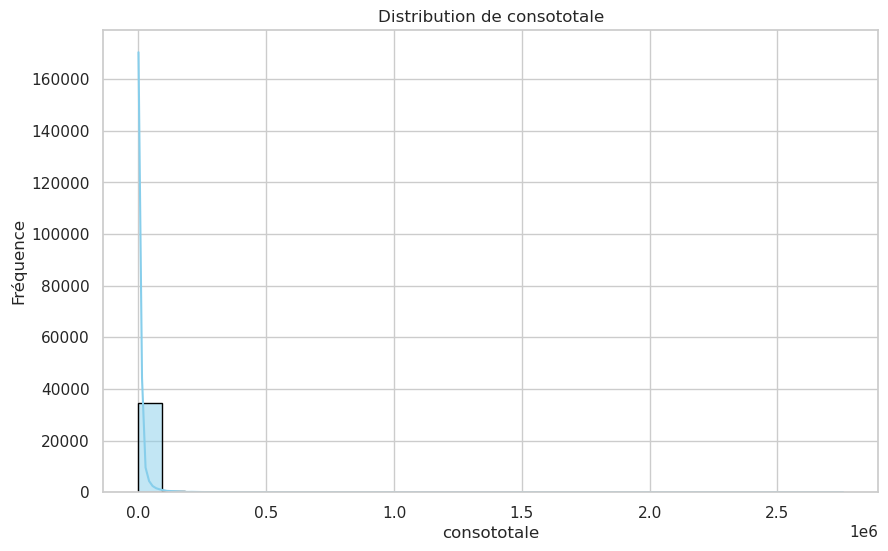

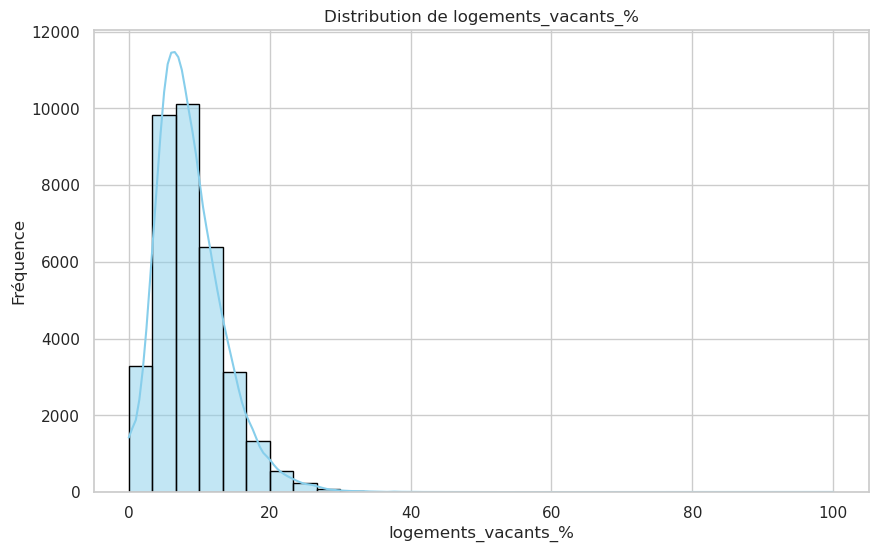

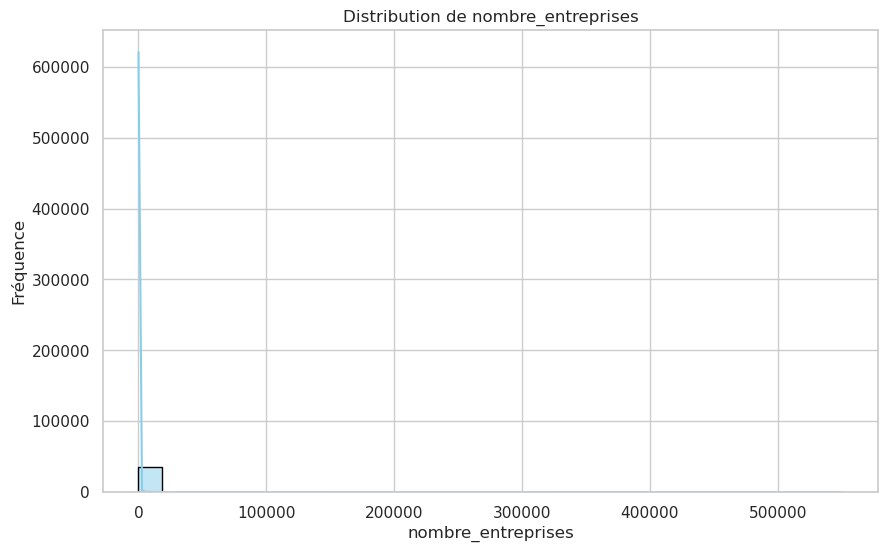

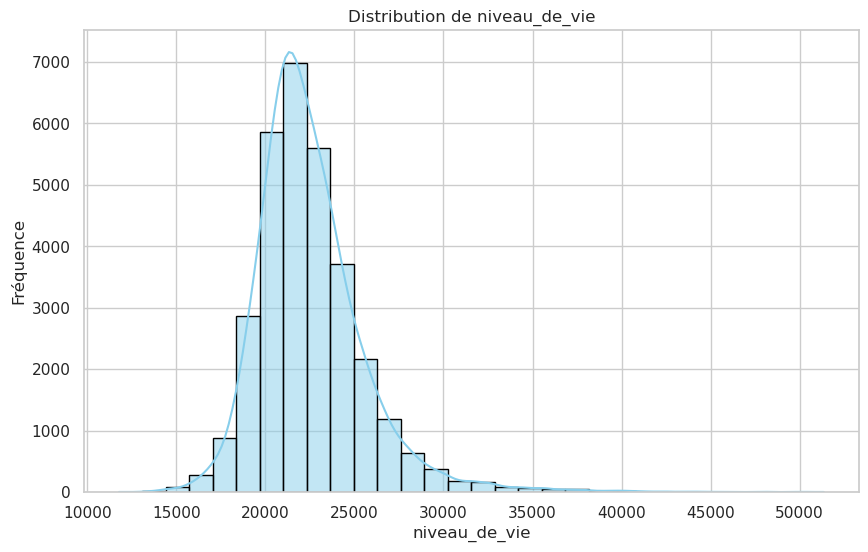

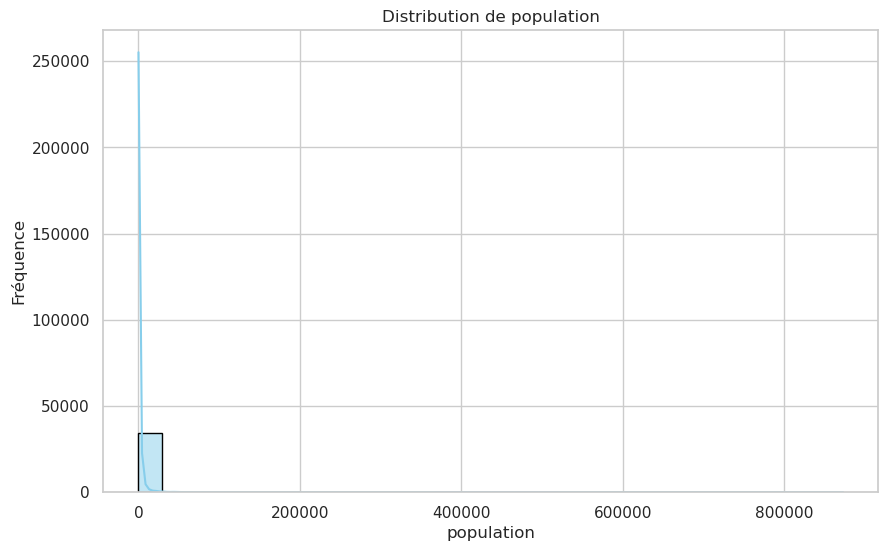

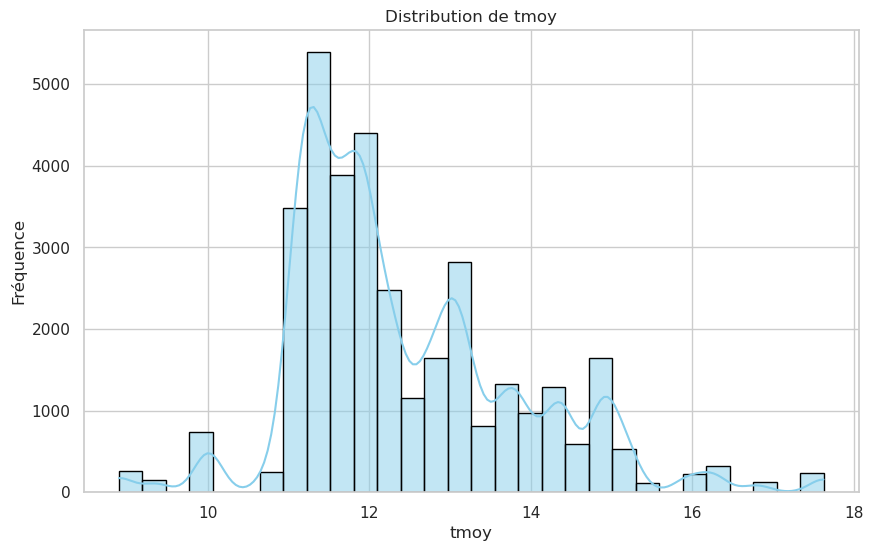

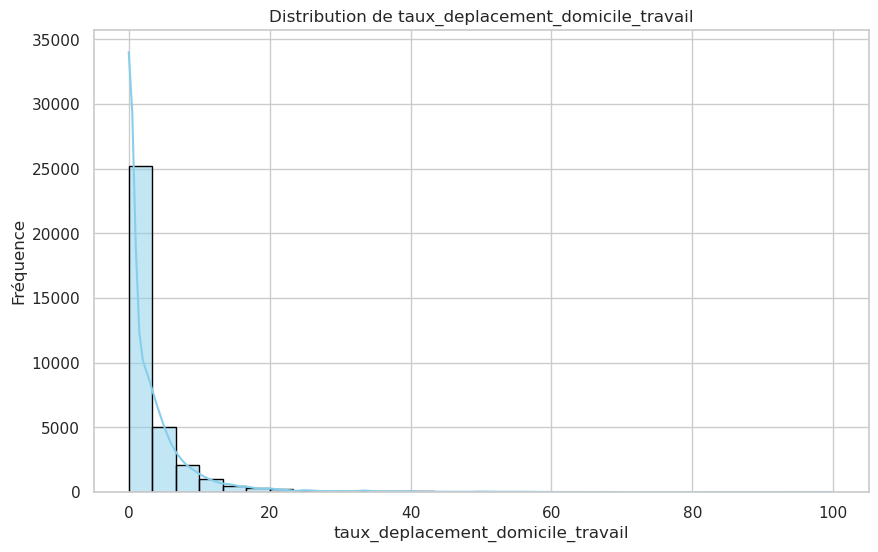

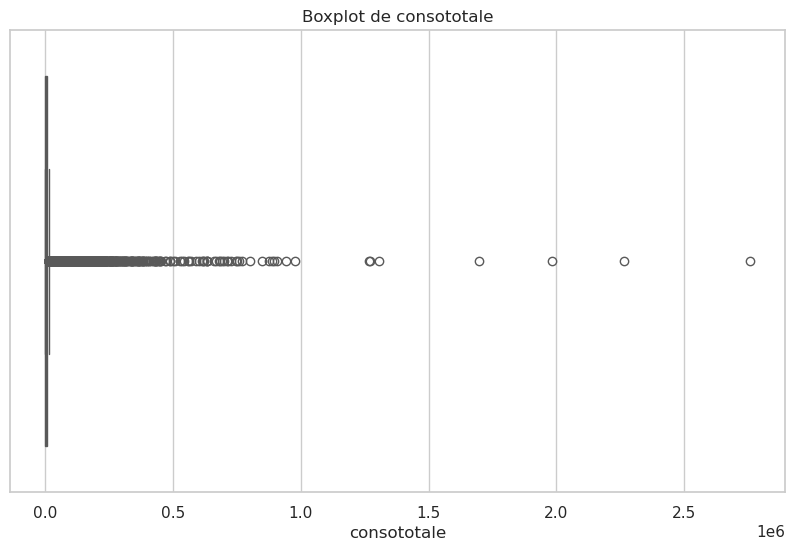

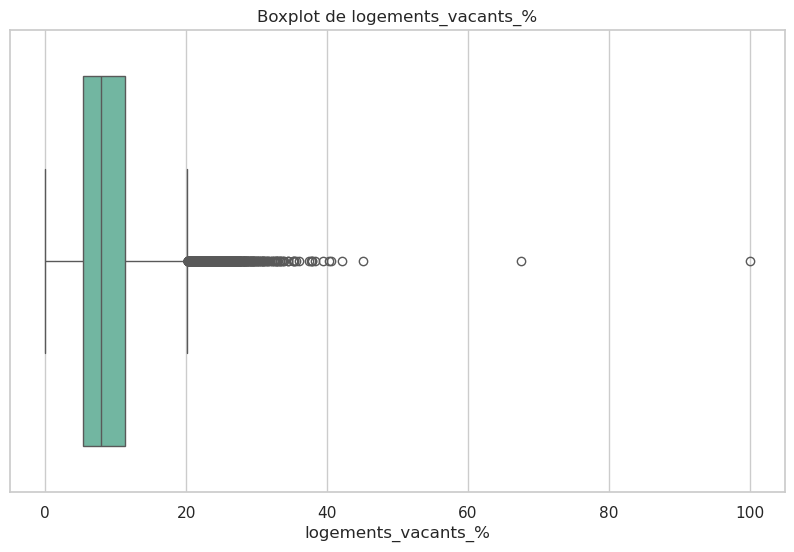

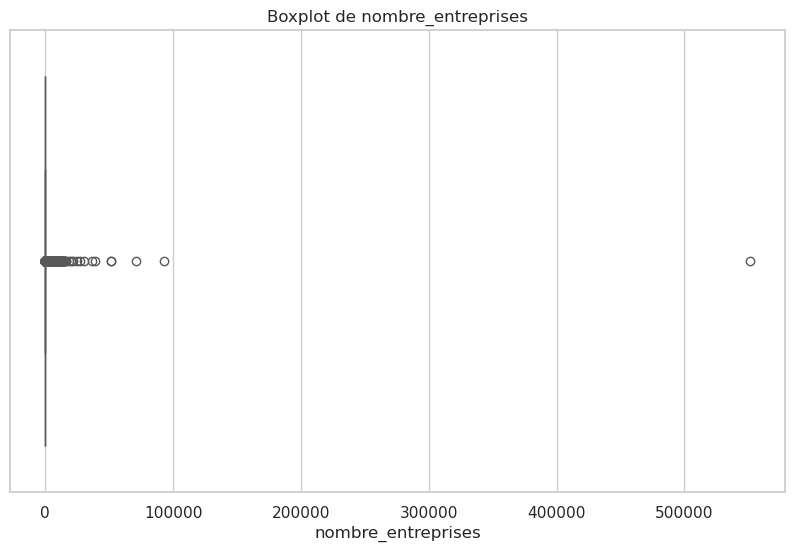

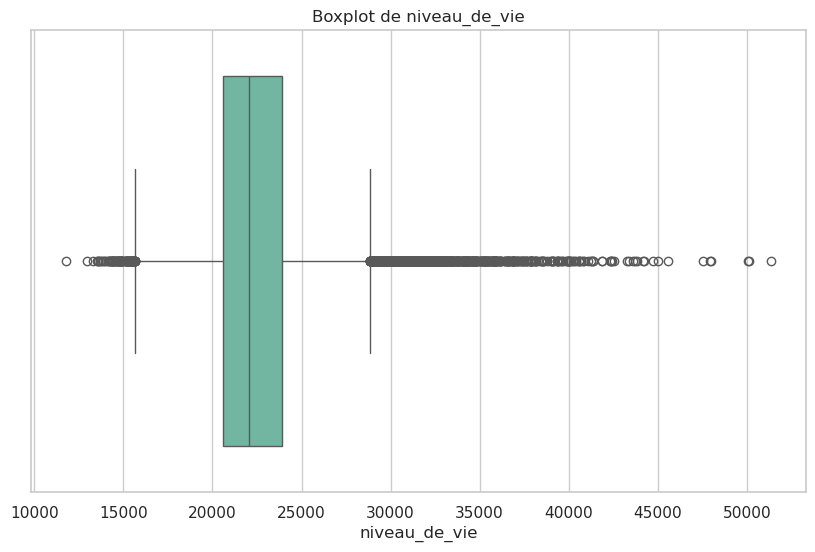

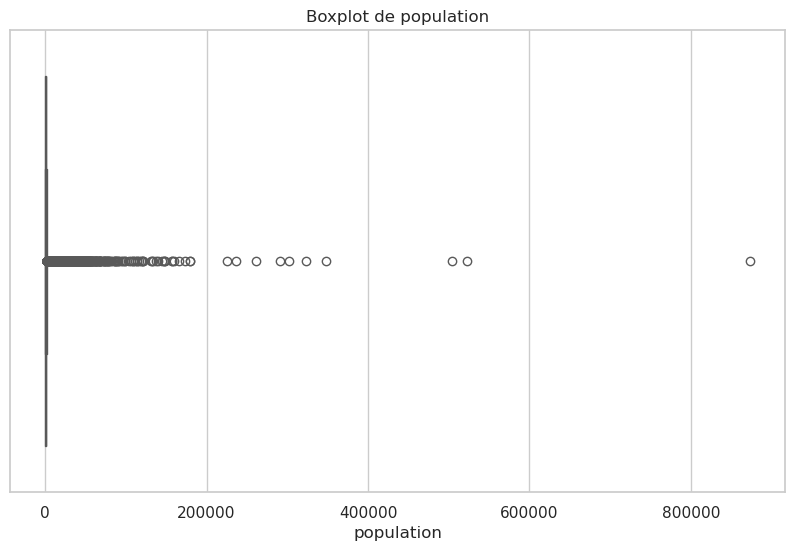

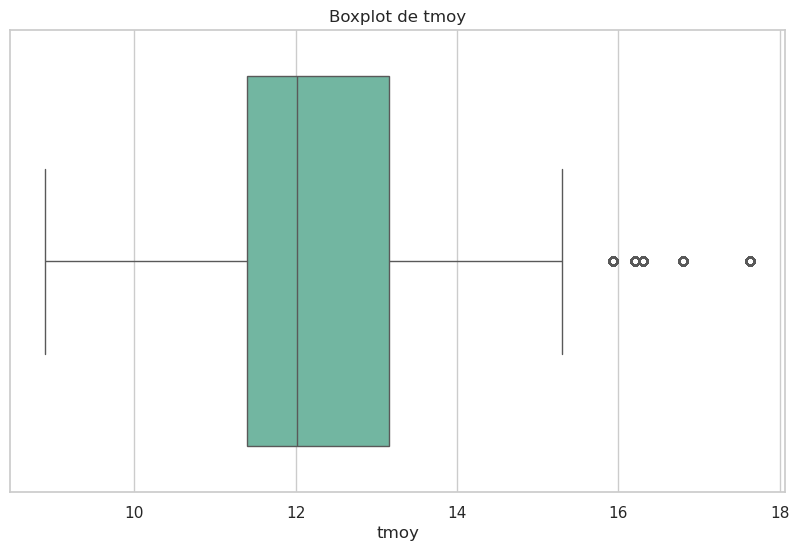

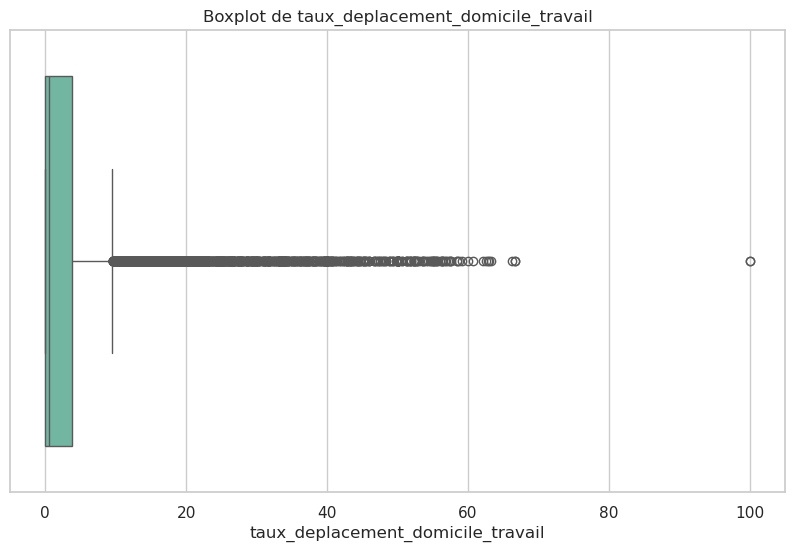

In [23]:
warnings.filterwarnings('ignore')

# Configuration du style des graphiques
sns.set(style="whitegrid")

# Histogrammes améliorés pour les variables numériques
for col in variables_modele:
    plt.figure(figsize=(10, 6))
    sns.histplot(table_donnees[col], kde=True, color="skyblue", edgecolor='black', bins=30)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

# Boxplots améliorés pour les variables numériques
for col in variables_modele:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=table_donnees[col], palette="Set2")
    plt.title(f'Boxplot de {col}')
    plt.show()


On observe pour plusieurs variables (consototale, nombre entreprise et population) une boîte à moustaches écrasée dans le boxplot et des barres fortement concentrées dans l'histogramme, masquant ainsi les détails de la dispersion dans la partie concentrée des données. La visualisation d'un tel boxplot/histogramme peut devenir complexe. Ceci est dû au fait que la plupart des données sont concentrées dans un intervalle étroit, tandis qu'une partie importante s'étend sur une échelle beaucoup plus large.

### Focus sur la température

In [24]:
#Max min
Mt=table_donnees['tmoy'].max()
mt=table_donnees['tmoy'].min()
#on distingue trois groupes de communes selon la température pour observer les causalités et les corrélations.
table_donnees['grp_tmp']=[ "Chaud" if t > 2*(Mt-mt)/3 +mt  else ("Froid" if t < (Mt-mt)/3 +mt else "Tempéré") for t in table_donnees['tmoy']]


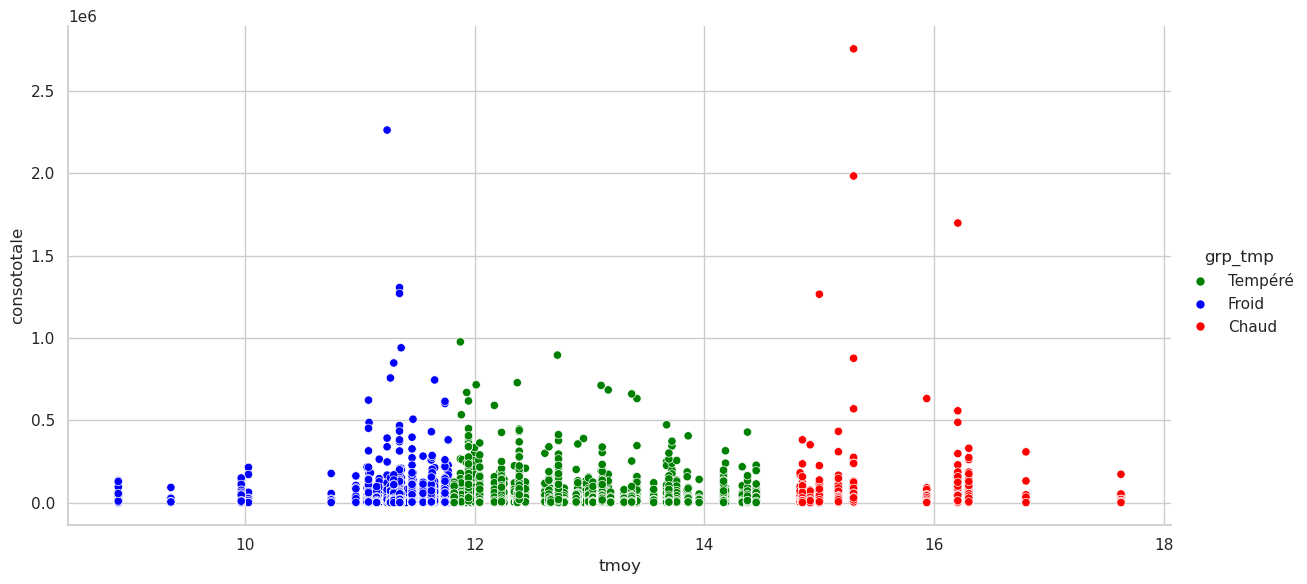

In [25]:
custom_palette = {'Chaud': 'red', 'Tempéré': 'green', 'Froid': 'blue'}
sns.relplot(data=table_donnees, y="consototale", x="tmoy", hue="grp_tmp", height=6, aspect=2,palette=custom_palette)

Ce graphique permet de mettre en évidence la consomation des communes en fonction de la température. Nous pouvons remarquer qu'il semblerait que les communes avec des climats "froids" et "tempérés" consomment davatange (au delà de 0.5) comparé aux communes avec un "climat chaud". Cependant, le graphique ne possède pas de réelle relation décroissante entre consommation et température, d'autres facteurs que la météo influencent donc la consomation d'énergie.

In [ ]:
sns.pairplot(data=table_donnees, hue="grp_tmp",palette=custom_palette)

L'intérêt de ce graphique est de cerner les possibles relations entre les variables. On observe une possible relation linéaire entre population et nombre_entreprises

## Analyse géographique : cartes

Dans cette section, nous explorerons le jeu de de données d'un point de vue graphique. La cartographie de ces données nous permettra d'appréhender les disparités géographiques, de mettre en lumière des tendances régionales/départementales, et d'identifier des schémas spatiaux significatifs. Les nuances de couleur, les concentrations et les disparités géographiques seront autant d'éléments mis en évidence pour aider à comprendre les dynamiques et les caractéristiques propres à chaque commune.

In [ ]:
# fond de carte metropole commune
metropole_communes = s3.download_vectorfile_url_all(
      values = "metropole",
      crs = 4326,
      borders = "COMMUNE",
      vectorfile_format="topojson",
      filter_by="FRANCE_ENTIERE",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)
metropole_communes.rename(columns={'INSEE_COM': 'code_commune'}, inplace=True)
metropole_communes = metropole_communes.drop('territoire', axis=1)

In [ ]:
# fond de carte Dom TOM
dom_tom_communes = s3.download_vectorfile_url_all(
      values = ["971","972","973","974"],
      crs = 4326,
      borders = "COMMUNE",
      vectorfile_format="topojson",
      filter_by="DEPARTEMENT",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)
dom_tom_communes.rename(columns={'INSEE_COM': 'code_commune'}, inplace=True)

In [ ]:
#Copie du data frame pour visualiser les cartes
df= table_donnees.copy()

In [ ]:
def generer_carte(variable):
    
    carte = pd.merge(df, metropole_communes[["code_commune", "geometry"]], on="code_commune", how='inner')
    gdf = gpd.GeoDataFrame(carte, geometry='geometry')
    fig, ax = plt.subplots(figsize=(30, 30))
    
    vmin = gdf[variable].min()
    vcenter = gdf[variable].mean()
    vmax = gdf[variable].max()

    cmap = 'coolwarm' if variable == 'tmoy' else 'RdYlGn_r'
    linewidth = 0.05 if variable == 'tmoy' else 0.5
    
    norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)

    # Tracé de la carte avec la couleur basée sur la variable spécifiée
    gdf.plot(column=variable, cmap=cmap, linewidth=linewidth, ax=ax, edgecolor='0.8', norm=norm)

    # Ajout d'une barre de couleur :
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="2%", pad=0.5)

    # Utilisez la colonne normalisée pour la barre de couleur
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm._A = []
    cbar = plt.colorbar(sm, cax=cax)

    # Suppression des axes
    ax.set_axis_off()

    # Ajouter un titre à la carte
    plt.suptitle(f"Carte de France - {variable}", fontsize=20, x=0.5, y=0.75)

    # Afficher la carte
    plt.show()

In [ ]:
generer_carte('consototale')

On observe une consommation d'électricité relativement élevé dans les zone urbaines fortement peuplés, telles que la région parisienne, lyonnaise, lilloises, bordelaise ou encore en côte d'azur. A l'inverse, les zones moins peuplées semblent présenter des consommations d'électricité plus modestes : on le constate nottament grâce au code couleur de la carte sur la diagonale du vide. 

Suite à l'observation de cette disparité de la consommation d'électricité selon la population, nous pouvons penser que la consommation d'energie dépends de façon linéaire et uniquement de la variable de population. Pour aller plus loin dans cette piste, nous décidons de regarder la consommation d'électricité par tête au niveau communale, ainsi, on corrige l'effet taille, et on observe l'effet de toutes les autres variables sur la consommation d'électricité 

In [ ]:
# Création de la variable consommation par tête
df["consommation_par_tête"] = df["consototale"]/df["population"]

In [ ]:
generer_carte('consommation_par_tête')

Nouvelles conclusions, consommation dans les alpes plus forte. À la différence de la carte précédente, les données semblent présenter une dispersion moindre entre les communes. L'inégalité de la carte suggère que la consommation d'énergie ne dépend pas linéairement de la population seule. Néanmoins, l'homogénéité des couleurs sur la carte indique que la population joue un rôle prépondérant dans l'explication de la consommation d'électricité. Ces constatations renforcent l'idée que la population est un facteur déterminant, bien que d'autres variables puissent également influencer cette relation complexe.

Nous pourrons confirmer ou infirmer ces hypothèses dans la partie qui suit : Modélisation

In [ ]:
variables_explicatives = ['logements_vacants_%', 'nombre_entreprises', 'niveau_de_vie', 'population', 'tmoy', 'taux_deplacement_domicile_travail']

# Générer les cartes pour chaque variable explicative
for variable in variables_explicatives :
    generer_carte(variable)

In [ ]:
# 1. Identifier tous les objets GeoDataFrame
all_vars = globals().copy() # ou locals() si vous êtes dans une fonction locale
for name, obj in all_vars.items():
    if isinstance(obj, gpd.GeoDataFrame):
        # 2. Supprimer tous sauf le GeoDataFrame désiré
        del globals()[name]

# 1. Identifier tous les objets DataFrame
all_vars = globals().copy() # ou locals() si vous êtes dans une fonction locale
for name, obj in all_vars.items():
    if isinstance(obj, pd.DataFrame) and name != "table_donnees":
        # 2. Supprimer tous sauf "table_donnees"
        del globals()[name]

# 3. Utiliser le garbage collector
gc.collect()

# 4. Modélisation et Prédictions

## Modèle initial : régression linéaire sur toutes les variables

Notre variable expliquée est quantitative. C'est donc naturellement que, dans un premier temps, nous essayons de créer un modèle de régression linéaire multiple, avec les variables explicatives préalablement traités.

### Préparation des données

#### Suppression des données manquantes

In [ ]:
table_donnees=table_donnees.dropna()
table_donnees

#### Matrice de corrélation :

Une analyse de la matrice de corrélation est importante avant de lancer une régression linéaire multiple. Cette analyse permet d'identifier les relations linéaires entre chaque paire de variables. On peut ainsi repérer des redondances ou colinéarités qui pourraient affecter la stabilité des coefficients de régression. En anticipant ces situations, on peut ajuster le modèle, éliminant les variables redondantes et prévenant les problèmes d'instabilité.

In [ ]:
# Calcul de la matrice de corrélation
matrice_correlation = table_donnees[variables_modele].corr()

# Configuration de la palette de couleurs
palette = sns.diverging_palette(220, 20, as_cmap=True)

# Création de la heatmap avec Seaborn et attribution à une variable
heatmap = sns.heatmap(matrice_correlation, annot=True, cmap=palette, vmin=-1, vmax=1)

# Affichage des noms de variables en haut de la matrice
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

# Affichage de la matrice de corrélation
plt.show()

#### Analyse de la Matrice de Corrélation :

En observant la première ligne de la matrice de corrélation, nous examinons les relations entre la variable explicative et chacune des variables expliquées. Nous constatons une corrélation quasi nulle entre la population et le taux de logements vacants, le niveau de vie, ainsi que la température moyenne. En revanche, une corrélation empirique robuste se dessine entre la consommation totale et le nombre d'entreprises, la taille de la population, et le taux de déplacement domicile-travail en transports en commun. Ces variables émergent comme potentiellement cruciales pour notre modèle de régression.

Par ailleurs, une corrélation quasi parfaite se manifeste entre le nombre d'entreprises et la population, soulignant une relation étroite entre ces deux variables. Enfin, une corrélation significative apparaît entre le taux de déplacement domicile-travail en transport en commun et le nombre d'entreprises, le niveau de vie, ainsi que la population.

Ces corrélations empiriques guideront nos décisions dans le choix des variables pour la régression à venir. Nous considérerons attentivement ces relations pour assurer la pertinence et la robustesse de notre modèle.

#### Standardisation des données

Nous passons maintenant à la phase de standardisation des données, une étape présentant plusieurs avantages. En effet, ici, l'intérêt de la standardisation des donénes est de faciliter la comparaison directe des coefficients dans les modèles, permettant ainsi une interprétation plus aisée de l'importance relative des variables en fonction de la taille de leurs coefficients.

In [ ]:
scaler = StandardScaler()

# Créez une copie du DataFrame initial
df_standardise = table_donnees.copy()

# Standardisez les colonnes spécifiées
df_standardise[variables_modele] = scaler.fit_transform(df_standardise[variables_modele])

# Sélectionnez les colonnes non standardisées
colonnes_non_standardisees = [col for col in df_standardise.columns if col not in variables_modele]

# Réorganisez les colonnes pour avoir les non standardisées au début suivies des standardisées
df_standardise = df_standardise[colonnes_non_standardisees + variables_modele]

df_standardise

Visualisation de l'impact de la standardisation sur la valeur des données (exemple pour la variable taux de logement vacants)

In [ ]:
# Création de l'histogramme avant la standardisation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(table_donnees['logements_vacants_%'], bins=40, color='blue', edgecolor='black')
plt.title('logements_vacants_% avant standardisation')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.xlim([0, table_donnees['logements_vacants_%'].max()])

# Création de l'histogramme après la standardisation
plt.subplot(1, 2, 2)
plt.hist(df_standardise['logements_vacants_%'], bins=40, color='green', edgecolor='black')
plt.title('logements_vacants_% après standardisation')
plt.xlabel('Valeurs standardisées')
plt.ylabel('Fréquence')

plt.xlim([-df_standardise['logements_vacants_%'].max(), df_standardise['logements_vacants_%'].max()])# Affichage des deux histogrammes# Affichage des deux histogrammes
plt.tight_layout()
plt.show()


On observe que les données initialement positives, une fois standardisées, peuvent prendre des valeur négatives. De plus, leur dispertion devient bien plus faible

In [ ]:
# Création de l'histogramme avant la standardisation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(table_donnees['logements_vacants_%'], bins=40, color='blue', edgecolor='black')
plt.title('Histogramme avant standardisation')
plt.xlabel('Valeurs')
plt.ylabel('Fréquence')
plt.xlim([-table_donnees['logements_vacants_%'].max(), table_donnees['logements_vacants_%'].max()])

# Création de l'histogramme après la standardisation
plt.subplot(1, 2, 2)
plt.hist(df_standardise['logements_vacants_%'], bins=40, color='green', edgecolor='black')
plt.title('Histogramme après standardisation')
plt.xlabel('Valeurs standardisées')
plt.ylabel('Fréquence')

plt.xlim([-table_donnees['logements_vacants_%'].max(), table_donnees['logements_vacants_%'].max()])

# Affichage des deux histogrammes
plt.tight_layout()
plt.show()

### Modèle et interpretations

#### Création d'une base test et d'une base d'entraînement

Dans un modèle de régression linéaire, la division du jeu de données en bases d'entraînement et test est importante pour évaluer la capacité du modèle à généraliser à de nouvelles données. La base d'entraînement permet au modèle d'apprendre sur une partie des données, tandis que la base test sert à évaluer sa performance sur des données non étudiées. En effet, une bonne performance sur l'ensemble d'entraînement ne garantit pas une généralisation réussie. La division des données facilite une évaluation objective de la capacité prédictive du modèle de régression linéaire, améliorant ainsi sa fiabilité.

In [ ]:
# Séparation en variables indépendantes (X) et variable dépendante (y)
X = df_standardise.drop(['code_commune','libelle_commune','consototale','grp_tmp'], axis=1)
y = df_standardise['consototale']

# Division des données en ensemble d'entraînement (train set) et ensemble de test (test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# "test_size" détermine la proportion d'observations à inclure dans l'ensemble de test (ici, 20%)
# "random_state" est utilisé pour garantir la reproductibilité des résultats, on peut choisir n'importe quel nombre

# Affichage des dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensions de l'ensemble de test (X_test, y_test):", X_test.shape, y_test.shape)

#### Modèle de régression linéaire :

On prépare et créer maintenant le modèle de régression linéaire à partir des données d'entraînement

In [ ]:
import statsmodels.api as sm

# Ajouter une constante à la matrice des caractéristiques (X) pour le terme d'interception
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Création d'un modèle de régression linéaire
modele_regression = sm.OLS(y_train, X_train).fit()

#### Interprétation / significativité des coefficients

In [ ]:
modele_regression.summary()

### Interprétation des coefficients : 

#### Logements_vacants_% :
* Coefficient : -0.0050. Ce coefficient est faible, en valeur absolue, et relativement aux autres coefficients : il semblerait donc que cette variable explique peu la consommation d'énergie.
* Signe : négatif. Il semblerait donc qu'augmenter le taux de logements vacants dans une commune fasse diminuer la consommation totale d'énergie.
* P-value : 0.368. Il semblerait que cette variable ne soit pas significative, même au seuil de 10%.

#### nombre_entreprises :
* Coefficient : -0.2525. Ce coefficient est légerement élevé, en valeur absolue, et relativement aux autres coefficients : il semblerait donc que cette variable explique légerement la consommation d'énergie.
* Signe : négatif. Il semblerait donc qu'augmenter le nombre d'entreprises dans une commune fasse diminuer la consommation totale d'énergie.
* P-value : 0.000. Il semblerait que cette variable soit significative, même au seuil de 1%.

#### niveau_de_vie :
* Coefficient : 0.0008. Ce coefficient est faible, en valeur absolue, et relativement aux autres coefficients : il semblerait donc que cette variable explique peu la consommation d'énergie
* Signe : positif. Il semblerait donc qu'augmenter le niveau de vie dans une commune fasse augmenter la consommation totale d'énergie.
* P-value : 0.894. Il semblerait que cette variable ne soit pas significative, même au seuil de 10%

#### population :
* Coefficient : 0.8133. Ce coefficient est élevé, en valeur absolue, et relativement aux autres coefficients : il semblerait donc que cette variable explique beaucoup la consommation d'énergie
* Signe : positif. Il semblerait donc qu'augmenter la population dans une commune fasse augmenter la consommation totale d'énergie.
* P-value : 0.000. Il semblerait que cette variable soit significative, même au seuil de 1%

#### tmoy :
* Coefficient : 0.0275. Ce coefficient est faible, en valeur absolue, et relativement aux autres coefficients : il semblerait donc que cette variable explique peu la consommation d'énergie.
* Signe : positif. Il semblerait donc qu'augmenter la température moyenne dans un département fasse augmenter la consommation totale d'énergie des communes.
* P-value : 0.000. Il semblerait que cette variable soit significative, même au seuil de 1%.

#### taux_deplacement_domicile_travail :
* Coefficient :  0.0653. Ce coefficient est faible, en valeur absolue, et relativement aux autres coefficients : il semblerait donc que cette variable explique peu la consommation d'énergie.
* Signe : positif. Il semblerait donc qu'augmenter le taux de déplacements domicile-travail en transports en commun dans une commune fasse augmenter la consommation totale d'énergie.
* P-value : 0.000. Il semblerait que cette variable soit significative, même au seuil de 1%.

Pour conclure sur l'analyse des coefficients de ce modèle, on observe des signes de coefficients qui vont à l'encontre de nos hypothèses : Nous avions supposé que les relations entre le taux de logements vacants, ainsi que le nombre d'entreprises, avec la consommation d'energie était positives. La régression semble nous indiquer le contraire. Parallèlement, Nous avions supposé une relation négative entre la température moyenne et la consommation d'énergie. Encore une fois, la régression semble nous indiquer le contraire. D'après les test individuels de Student, il semblerait que 4 des 6 variables explicatives soient significatives, ce résultat est relativement encourageant.

### Évaluation de la qualité de prédiction du modèle

Maintenant qu'on a interprété les coefficients, on revient à des données non standardisées :

In [ ]:
import statsmodels.api as sm

# Séparation en variables indépendantes (X) et variable dépendante (y)
X = table_donnees.drop(['code_commune','libelle_commune','consototale','grp_tmp'], axis=1)
y = table_donnees['consototale']

# Division des données en ensemble d'entraînement (train set) et ensemble de test (test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Affichage des dimensions des ensembles d'entraînement et de test
print("Dimensions de l'ensemble d'entraînement (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensions de l'ensemble de test (X_test, y_test):", X_test.shape, y_test.shape)

# Ajouter une constante à la matrice des caractéristiques (X) pour le terme d'intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Création d'un modèle de régression linéaire
modele_regression = sm.OLS(y_train, X_train).fit()

modele_regression.summary()

#### Évaluation du modèle

 Afin d'évaluer le modèle, on l'applique sur la base d'entraînement, et on compare les résultats de prédications avec les données. Le R2 nous donnera une indication de la qualité du modèle

In [ ]:
# Prédictions sur l'ensemble de test
predictions = modele_regression.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

On observe un R² de 0,63. En d'autres termes, environ 63 % de la variance de la variable dépendante est expliquée par le modèle de régression. Ce résultat semble relativement correct, mais on pourra par la suite chercher à améliorer le modèle.

### Visualisation

On cherche maintenant à visualier la qualité du modèle. Pour cela, on propose de construire un nuage de points qui affiche les vraies valeurs en abscisse, et les valeurs prédites en ordonnées

In [ ]:
# Création d'une disposition de sous-tracés 1x3
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(y_test, predictions, label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='y=x', linewidth=2)
plt.xlabel("Vraies valeurs")
plt.ylabel("Prédictions")
plt.legend()

plt.subplot(132)
plt.scatter(y_test, predictions, label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='y=x', linewidth=2)
plt.xlabel("Vraies valeurs")
plt.ylabel("Prédictions")
plt.xlim(-30000, 500000)
plt.ylim(-30000, 500000)
plt.legend()

plt.subplot(133)
plt.scatter(y_test, predictions, label='Prédictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label='y=x', linewidth=2)
plt.xlabel("Vraies valeurs")
plt.ylabel("Prédictions")
plt.xlim(-10000, 200000)
plt.ylim(-10000, 200000)
plt.legend()

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))


# Affichage des sous-tracés
plt.tight_layout()
plt.show()

D'un point de vue visuel, la qualité du modèle s'améliore à mesure que les points se rapprochent de la droite en pointillés. En effet, lorsque les points s'éloignent de cette droite, cela indique une augmentation des résidus, ce qui témoigne d'une moindre précision du modèle. On peut maintenant s'intéresser aux résidus eux même :

In [ ]:
# Prédictions sur la base de test standardisée
predictions_test = modele_regression.predict(X_test)

# Calcul des résidus
residus = y_test - predictions_test

# Création d'une figure avec deux sous-graphiques
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Histogramme des résidus
axes[0].hist(residus, bins=100, edgecolor='black')
axes[0].set_title('Histogramme des Résidus')
axes[0].set_xlabel('Résidus')
axes[0].set_ylabel('Fréquence')

# Courbe de densité des résidus
sns.kdeplot(residus, fill=True, ax=axes[1])
axes[1].set_title('Courbe de Densité des Résidus')
axes[1].set_xlabel('Résidus')
axes[1].set_ylabel('Densité')

# Ajustement de l'espace entre les sous-graphiques
plt.tight_layout()

# Affichage du graphique
plt.show()


D'après cette visualisation, les résidus semblent centrés en 0. On cherche maintenant à vérifier ces hypothèses via des tests :

### Évaluation des hypothèses du modèle

Le modèle de régression linéaire repose sur plusieurs hypothèses sur les résidus tels que : 

* Normalité des Résidus : Les résidus du modèle devraient suivre une distribution normale. Cela signifie que la majorité des résidus devraient se situer près de zéro, et la distribution des résidus devrait être symétrique.

* Homoscédasticité : La variance des résidus devrait rester constante pour toutes les valeurs prédites. En d'autres termes, il ne devrait pas y avoir de schéma systématique dans la dispersion des résidus le long de la plage des valeurs prédites.

* Indépendance des Résidus : Les résidus doivent être indépendants les uns des autres. Cela signifie qu'il ne devrait pas y avoir de structure identifiable dans la séquence des résidus.

In [ ]:
# Statistiques descriptives sur les résidus
mean_residus = np.mean(residus)
median_residus = np.median(residus)
std_dev_residus = np.std(residus)

# Affichage des statistiques descriptives
print(f"Moyenne des résidus : {mean_residus}")
print(f"Médiane des résidus : {median_residus}")
print(f"Écart-type des résidus : {std_dev_residus}")

Interpréter les statistiques descriptives des résidus peut fournir des informations importantes sur la qualité de votre modèle de régression. Voici comment interpréter certaines de ces informations :

* Moyenne des résidus : Si la moyenne des résidus est proche de zéro, cela suggère que le modèle ne présente pas de biais systématique.

* Médiane des résidus : La médiane peut être moins sensible aux valeurs aberrantes que la moyenne. Une médiane proche de zéro indique également une absence de biais systématique.

* Écart-type des résidus : L'écart-type des résidus mesure la dispersion des résidus autour de la moyenne. Une valeur faible suggère que les résidus sont généralement proches de la moyenne, ce qui est souhaitable. Une valeur élevée peut indiquer une grande variabilité des erreurs de prédiction.

En résumé, des résidus centrés autour de zéro avec une dispersion modérée indiquent généralement un bon ajustement du modèle.

La visualisation des prédictions ne constitue pas en elle-même une approche scientifique pour vérifier la validité des hypothèses de la régression linéaire. Afin d'effectuer une évaluation formelle, nous nous appuyons sur une batterie de tests spécialisés :

In [ ]:
import numpy as np
from scipy.stats import shapiro, bartlett
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

warnings.filterwarnings('ignore')

# Récupérer les résidus depuis le modèle
residus = modele_regression.resid

# Récupérer les variables explicatives utilisées lors de l'ajustement du modèle
exog_vars = modele_regression.model.exog

# Test de normalité (Shapiro-Wilk)
stat_shapiro, p_shapiro = shapiro(residus)
print(f"Test de normalité (Shapiro-Wilk): Statistique={stat_shapiro}, p-value={p_shapiro}")

# Test d'indépendance (Durbin-Watson)
stat_dw = durbin_watson(residus)
print(f"Test d'indépendance (Durbin-Watson): Statistique={stat_dw}")

# Test d'homoscédasticité (Breusch-Pagan)
test_stat_breusch, p_value_breusch, _, _ = het_breuschpagan(residus, exog_vars)
print(f"Test d'homoscédasticité (Breusch-Pagan): Statistique={test_stat_breusch}, p-value={p_value_breusch}")

* Test de normalité (Shapiro-Wilk) : la p-value étant de 0.0, on rejette l'hypothèse nulle. Ainsi, les résidus ne suivent pas une distribution normale.

* Test d'indépendance (Durbin-Watson) : La statistique de Durbin - Watson est très proche de 2, on suppose une très faible autocorrélation des résidus

* Test d'homoscédasticité (Breusch-Pagan) : la p-value étant très proche de 0.0, on rejette l'hypothèse nulle. Ainsi, les résidus sont hétéroscédastiques.

On pourra tenter d'améliorer le résultat de ces tests, et de valider les hypothèses de régression dans les modèles suivants

## Modèles intermédiaires : au-delà de la régression linéaire

On cherche maintenant à améliorer notre modèle initial. On ne se contente pas de considérer uniquement un modèle de régression linéaire. On se propose d'étudier également d'autres modèles, tels que le modèle de régression pénalisé (Ridge, Lasso), des arbres de décisions, des random forest, des descente de gradient, SVM et enfin réseau de neuronne

In [ ]:
table_donnees_pred=table_donnees.drop(['code_commune', 'libelle_commune', 'grp_tmp'],axis=1)

# Séparation des variables indépendantes et dépendantes
y = table_donnees_pred['consototale']
X = table_donnees_pred.drop(['consototale'], axis=1)

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dictionnaire pour stocker les erreurs des modèles
model_errors = {}

# Modèles à tester
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "Neural Network": MLPRegressor(max_iter=1000)  # Augmentation du nombre d'itérations pour une meilleure convergence
}

# Entraînement et évaluation de chaque modèle
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_errors[name] = mse
    print(f"{name}: MSE = {mse}")

# Trouver le modèle avec l'erreur la plus faible
best_model = min(model_errors, key=model_errors.get)
print(f"\nMeilleur modèle: {best_model} avec une MSE de {model_errors[best_model]}")



## Modèle final : transformation logarithmique et carré

### Méthode exhaustive de sélection de variables

La méthode exhaustive de sélection de variables permet d'identifier le meilleur sous-ensemble de variables explicatives pour un modèle de régression. Elle consiste à évaluer toutes les combinaisons possibles de variables et à sélectionner celle qui améliore le plus la performance du modèle selon des critères spécifiques, tels que l'Akaike Information Criterion (AIC) ou le Bayesian Information Criterion (BIC).

Nous transformons d'abord les données en appliquant différentes transformations (logarithmique, carrée ou aucune) pour chaque variable numérique. Ensuite, nous explorons exhaustivement toutes les combinaisons possibles de ces variables transformées pour trouver celle qui minimise l'AIC et le BIC du modèle. Chaque modèle est ajusté sur un ensemble d'entraînement et évalué sur un ensemble de test pour s'assurer de sa généralisation. Cela nous permet de comprendre quelles variables et quelles transformations conduisent à la prédiction la plus précise de la consommation totale d'énergie.

In [ ]:
# Transformation des données pour différentes combinaisons
def transform_data(df, transformation):
    transformed_df = df.copy()
    for col in df.columns:
        # Vérifier si la colonne est numérique avant d'appliquer une transformation
        if pd.api.types.is_numeric_dtype(df[col]):
            if transformation == "log" and df[col].min() > 0:
                transformed_df[col] = np.log(df[col])
            elif transformation == "squared":
                transformed_df[col] = np.square(df[col])
    return transformed_df

# Sélection exhaustive des variables pour la régression linéaire avec enregistrement de tous les modèles
def best_feature_combination(table_donnees, target_column):
    best_aic = float('inf')
    best_bic = float('inf')
    best_r2 = 0
    best_combination = None
    best_transformation = None
    features = [col for col in table_donnees.columns if col != target_column]
    all_models = []  # Liste pour stocker les informations de tous les modèles

    for transformation in ["log", "squared", "none"]:
        transformed_table = transform_data(table_donnees, transformation) if transformation != "none" else table_donnees

        for L in range(1, len(features) + 1):
            for subset in combinations(features, L):
                X = transformed_table[list(subset)]
                y = transformed_table[target_column]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
                aic = model.aic
                bic = model.bic
                r2 = r2_score(y_test, model.predict(sm.add_constant(X_test)))

                # Ajouter les informations du modèle actuel à all_models
                all_models.append({
                    "features": subset,
                    "transformation": transformation,
                    "aic": aic,
                    "bic": bic,
                    "R²": r2
                })

                if aic < best_aic and bic < best_bic:
                    best_aic = aic
                    best_bic = bic
                    best_combination = subset
                    best_transformation = transformation
                    best_r2 = r2
                    best_model = model

    return best_combination, best_transformation, best_aic, best_bic, best_r2, best_model, all_models

best_features, best_transformation, best_aic, best_bic, best_r2, best_model, all_models = best_feature_combination(table_donnees_pred, 'consototale')

# Affichage des meilleurs résultats
print(f"Meilleures caractéristiques: {best_features}")
print(f"Meilleure transformation: {best_transformation}")
print(f"Meilleur AIC: {best_aic}")
print(f"Meilleur BIC: {best_bic}")
print(f"R² correspondant au meilleur modèle: {best_r2}")


On observe qu'on a pu améliorer le modèle initial en passant au modèle final, puisqu'on a augmenter le R² de 0.63 à 0.74

In [ ]:
import numpy as np
from scipy.stats import shapiro, bartlett
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

warnings.filterwarnings('ignore')

# Récupérer les résidus depuis le modèle
residus = best_model.resid

# Récupérer les variables explicatives utilisées lors de l'ajustement du modèle
exog_vars = best_model.model.exog

# Test de normalité (Shapiro-Wilk)
stat_shapiro, p_shapiro = shapiro(residus)
print(f"Test de normalité (Shapiro-Wilk): Statistique={stat_shapiro}, p-value={p_shapiro}")

# Test d'indépendance (Durbin-Watson)
stat_dw = durbin_watson(residus)
print(f"Test d'indépendance (Durbin-Watson): Statistique={stat_dw}")

# Test d'homoscédasticité (Breusch-Pagan)
test_stat_breusch, p_value_breusch, _, _ = het_breuschpagan(residus, exog_vars)
print(f"Test d'homoscédasticité (Breusch-Pagan): Statistique={test_stat_breusch}, p-value={p_value_breusch}")

* Test de normalité (Shapiro-Wilk) : la p-value étant de 0.0, on rejette l'hypothèse nulle. Ainsi, les résidus ne suivent pas une distribution normale.

* Test d'indépendance (Durbin-Watson) : La statistique de Durbin - Watson est très proche de 2, on suppose une très faible autocorrélation des résidus

* Test d'homoscédasticité (Breusch-Pagan) : la p-value étant très proche de 0.0, on rejette l'hypothèse nulle. Ainsi, les résidus sont hétéroscédastiques.


Finalement, on aura réussi à améliorer la qualité prédictive du modèle, sans valider les hypothèses de la régression

In [ ]:
# Affichage de tous les modèles testés
for model in all_models:
    print(f"Caractéristiques: {model['features']}, Transformation: {model['transformation']}, AIC: {model['aic']}, BIC: {model['bic']}, R²: {model['r2']}")

### Statistiques descriptives des variables identifiées

In [ ]:
# Configuration des graphiques
sns.set(style="whitegrid")

n=len(best_features)

# Histogrammes
plt.figure(figsize=(15, 6))
for i, col in enumerate(best_features):
    plt.subplot(1, n, i+1)
    sns.histplot(table_donnees_pred[col], kde=True)
    plt.title(f'Histogramme de {col}')
plt.tight_layout()
plt.show()

# Diagrammes de dispersion
plt.figure(figsize=(15, 6))
for i, col in enumerate(best_features):
    plt.subplot(1, n, i+1)
    sns.scatterplot(data=table_donnees_pred, x=col, y='consototale')
    plt.title(f'{col} vs consototale')
plt.tight_layout()
plt.show()



### Entrainement du modèle final

In [ ]:
# Ignorer les avertissements pour une sortie propre
warnings.filterwarnings('ignore')

# Fonction pour transformer les données
def transform_data(df, transformation):
    transformed_df = df.copy()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            if transformation == "log" and df[col].min() > 0:
                transformed_df[col] = np.log(df[col])
            elif transformation == "squared":
                transformed_df[col] = np.square(df[col])
    return transformed_df

# Transformation des données
transformed_data = transform_data(table_donnees_pred, 'log')
# Sélectionner les meilleures caractéristiques pour le modèle
X = transformed_data[list(best_features)]
y = transformed_data['consototale']

# Entraînement du modèle de régression linéaire
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Récupération des coefficients
coefficients = model.params
intercept = coefficients[0]
coef = coefficients[1:]

# Formatage de l'équation de régression pour l'affichage en LaTeX
model_eq = r"$$\text{consototale} = "
model_eq += f"{intercept:.2f} "
for var, beta in zip(list(best_features), coef):
    sign = '+' if beta >= 0 else ''
    model_eq += f" {sign} {beta:.2f} \log({var}) "
model_eq += r"$$"

print("Modèle de régression linéaire :")
display(Latex(model_eq))



### Visualisation

In [ ]:
# Préparation des données avec la meilleure combinaison et transformation
transformed_table = transform_data(table_donnees, best_transformation)
X = transformed_table[list(best_features)]
y = transformed_table['consototale']

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Affichage des résultats du modèle
print(model.summary())

# Prédiction sur l'ensemble de test
y_pred = model.predict(sm.add_constant(X_test))

In [ ]:
residuals = y_test - y_pred

import matplotlib.pyplot as plt
import seaborn as sns

# Générer trois sous-graphiques horizontaux
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Premier graphique
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axes[0])
axes[0].set_title('Résidus vs Valeurs Prédites')
axes[0].set_xlabel('Valeurs Prédites')
axes[0].set_ylabel('Résidus')
axes[0].set_xlim([0, 1300000])

# Deuxième graphique (zoom)
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1}, ax=axes[1])
axes[1].set_title('Zoom')
axes[1].set_xlabel('Valeurs Prédites')
axes[1].set_xlim([0, 400000])

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()


In [ ]:
# Création d'une disposition de sous-tracés 1x3
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(y_test, y_pred, alpha=0.5, label='Prédictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # ligne de référence
plt.xlabel("Vraies Réelles")
plt.ylabel("Valeurs Prédites")
plt.legend()

plt.subplot(132)
plt.scatter(y_test, y_pred, alpha=0.5, label='Prédictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # ligne de référence
plt.xlabel("Vraies Réelles")
plt.ylabel("Valeurs Prédites")
plt.xlim(-30000, 500000)
plt.ylim(-30000, 500000)
plt.legend()

plt.subplot(133)
plt.scatter(y_test, y_pred, alpha=0.5, label='Prédictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # ligne de référence
plt.xlabel("Vraies Réelles")
plt.ylabel("Valeurs Prédites")
plt.xlim(-10000, 200000)
plt.ylim(-10000, 200000)
plt.legend()

plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=6))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=6))


# Affichage des sous-tracés
plt.tight_layout()
plt.show()

Les prédictions semblent moins dispersés et plus centrés autour de la droite. On pet supposer une amélioration du modèle par rapport au modèle initiale  

### Une petite application de prédiction

#### Application textuelle

In [ ]:
def predict_consototale(population, niveau_de_vie, nombre_entreprises, tmoy, tx_deplacement_travail, model):
    # Transformation des entrées
    log_population = np.log(population)
    log_niveau_de_vie = np.log(niveau_de_vie)
    log_nombre_entreprises = np.log(nombre_entreprises)
    log_tmoy = np.log(tmoy)
    log_tx_deplacement_travail = np.log(tx_deplacement_travail)


    # Préparation des données pour la prédiction
    X_pred = np.array([[1, log_nombre_entreprises, log_niveau_de_vie, log_population, log_tmoy, log_tx_deplacement_travail]])  # Ajoutez '1' pour la constante
    
    # Prédiction en utilisant le modèle
    prediction = model.predict(X_pred)[0]
    return prediction

# Demande de saisie des valeurs à l'utilisateur
population = float(input("Entrez la population: "))
niveau_de_vie = float(input("Entrez le niveau de vie: "))
nombre_entreprises = float(input("Entrez le nombre d'entreprises: "))
tmoy = float(input("Entrez la temperature moyenne: "))
tx_deplacement_travail = float(input("Entrez le taux de deplacement domicile-travail (entre 0 et 1): "))

# Prédiction de la consototale
consototale_estimee = predict_consototale(population, niveau_de_vie, nombre_entreprises, tmoy, tx_deplacement_travail, model)

print(f"La consototale estimée est : {consototale_estimee:.1f}")



#### Widget

In [ ]:

def predict_consototale(population, niveau_de_vie, nombre_entreprises,tmoy, tx_deplacement_travail, model):
    log_population = np.log(population)
    log_niveau_de_vie = np.log(niveau_de_vie)
    log_nombre_entreprises = np.log(nombre_entreprises)
    log_tmoy = np.log(tmoy)
    log_tx_deplacement_travail = np.log(tx_deplacement_travail)
    X_pred = np.array([[1, log_nombre_entreprises, log_niveau_de_vie, log_population, tmoy, tx_deplacement_travail]])
    prediction = model.predict(X_pred)[0]
    return prediction

def on_predict(b):
    try:
        population = float(population_input.value)
        niveau_de_vie = float(niveau_de_vie_input.value)
        nombre_entreprises = float(nombre_entreprises_input.value)
        tmoy = float(tmoy_input.value)
        tx_deplacement_travail = float(tx_deplacement_travail_input.value)
        consototale_estimee = predict_consototale(population, niveau_de_vie, nombre_entreprises, tmoy, tx_deplacement_travail, model)
        output.clear_output()
        with output:
            print(f"La consototale estimée est : {consototale_estimee}")
    except ValueError as e:
        output.clear_output()
        with output:
            print("Erreur : Veuillez entrer des valeurs numériques valides.")

population_input = widgets.FloatText(value=0, description='Population:')
niveau_de_vie_input = widgets.FloatText(value=0, description='Niv de vie:')
nombre_entreprises_input = widgets.FloatText(value=0, description='Nb etp:')
tmoy_input = widgets.FloatText(value=0, description='Temp. moyenne:')
tx_deplacement_travail_input = widgets.FloatText(value=0, description='Tx dep dom-travail:')

predict_button = widgets.Button(description="Prédire")
predict_button.on_click(on_predict)

output = widgets.Output()

display(population_input, niveau_de_vie_input, nombre_entreprises_input, tmoy_input, tx_deplacement_travail_input, predict_button, output)


# 5. Synthèse et Recommandations

## Conclusions Clés 

#### Pistes d'amélioration : 

* Ajouter des variables pertinantes : 6 variables explicative nous semble être un nombre trop faible
* Améliorer la qualité de la variable météorologique, la manière dont elle est construite ne semble pas très rigoueureuse, ou même fiable
* Aller plus loin dans les secteurs : proposer un modèle qui analyse les différentes caractéristiques communales au niveau des entreprises (en fonction de leur secteur d'activité par exemple)
* Intégrer une saisonnalité dans le modèle
* Traitement des données abérantes
* Récupérer les données de niveau de vie pour les communes manquantes
* Récupérer les températures par communes, quand elles seront disponibles, afin d'augmenter la précision de notre modèle.
* Ulisation de la nouvelle base de données de Météo-France après la récente réforme sur l'accesibilité des données, rentrant en vigueur le 1er Janvier 2024. 

## Recommandations